<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap09/9_2_Implicit_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 9.2: Implicit Regularization**

This notebook investigates how the finite step sizes in gradient descent cause the trajectory to deviate and how this can be explained by adding an implicit regularization term.  It recreates figure 9.3 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#Create colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap_vals = np.vstack((r,g,b)).transpose()/255.0
my_colormap = ListedColormap(my_colormap_vals)

In [3]:
# define main function
def loss(phi0, phi1):
    phi1_std = np.exp(-0.5 * (phi0 * phi0)*4.0)
    return 1.0-np.exp(-0.5 * (phi1 * phi1)/(phi1_std * phi1_std))

# Compute the gradient (just done with finite differences for simplicity)
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001;
    gradient = np.zeros((2,1));
    gradient[0] = (loss(phi0+delta_phi/2.0, phi1) - loss(phi0-delta_phi/2.0, phi1))/delta_phi
    gradient[1] = (loss(phi0, phi1+delta_phi/2.0) - loss(phi0, phi1-delta_phi/2.0))/delta_phi
    return gradient;

In [4]:
# define grid to plot function
grid_values = np.arange(-0.8,0.5,0.01);
phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
loss_function = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        loss_function[idphi0, idphi1] = loss(phi1,phi0)


In [5]:
# Perform gradient descent n_steps times and return path
def grad_descent(start_posn, n_steps, step_size):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step]);
        grad_path[:,c_step+1] = grad_path[:,c_step] - step_size * this_grad[:,0]
    return grad_path;

In [6]:
# Draw the loss function and the trajectories on it
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path_tiny_lr=None, grad_path_typical_lr=None):
    fig = plt.figure();
    ax = plt.axes();
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap);
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.set_xlabel('$\phi_{0}$'); ax.set_ylabel('$\phi_{1}$')

    if grad_path_typical_lr is not None:
        ax.plot(grad_path_typical_lr[0,:], grad_path_typical_lr[1,:],'ro-')
    if grad_path_tiny_lr is not None:
        ax.plot(grad_path_tiny_lr[0,:], grad_path_tiny_lr[1,:],'b-')
    plt.show()

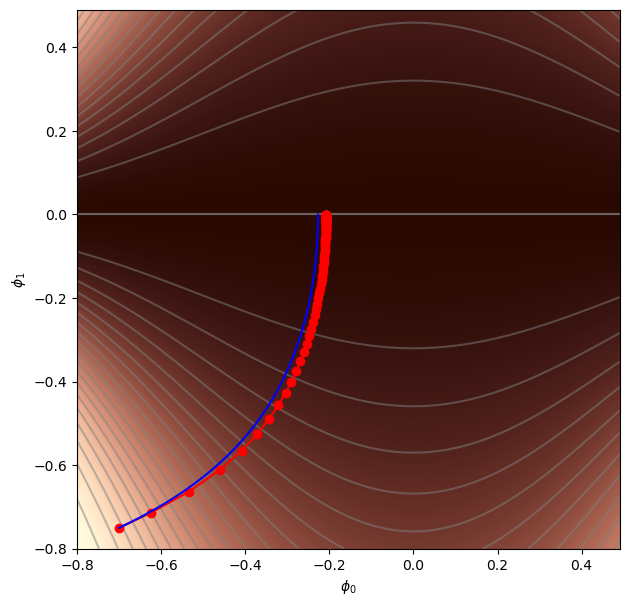

In [7]:
# Define the start position
start_posn = np.zeros((2,1)); start_posn[0,0] = -0.7; start_posn[1,0] = -0.75

# Run the gradient descent with a very small learning rate to simulate continuous case
grad_path_tiny_lr = grad_descent(start_posn, 10000, 0.001)
# Run the gradient descent with a typical sized learning rate
grad_path_typical_lr = grad_descent(start_posn, 100, 0.05)

draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path_tiny_lr, grad_path_typical_lr)


You can see that the two solutions do not converge to the same place.  The ideal continuous solution is in blue, but in practice, we run the gradient set with as large a learning rate as possible so that it converges quickly (red curve). <br>

It turns out that using a large learning rate often gives better generalization results (figure 9.5a from book), and presumably, this is because we converge to a different (and better) place.

But how can we characterize the effect of the large learning rate?  One way is to consider what regularization term we would have to add to the original loss function so that the continuous solution converges to the same place as the discrete version with the large learning rate did on the original curve.

In [8]:
# Compute the implicit regularization term (second term in equation 9.8 in the book)
def get_reg_term(phi0, phi1, alpha):
  # TODO -- compute this term
  # You can use the function get_loss_gradient(phi0, phi1) that was defined above
  # Replace this line:
  reg_term = alpha*0.25*np.sum(get_loss_gradient(phi0,phi1)**2)

  return reg_term;


# Compute modified loss function (equation 9.8)
def loss_reg(phi0, phi1, alpha):
    # The original function
    phi1_std = np.exp(-0.5 * (phi0 * phi0)*4.0)
    loss_out =  1.0-np.exp(-0.5 * (phi1 * phi1)/(phi1_std * phi1_std))

    # Add the regularization term that you just calculated above
    loss_out = loss_out + get_reg_term(phi0, phi1,alpha)
    return loss_out ;

# Compute gradient of modified loss function for gradient descent
def get_loss_gradient_reg(phi0, phi1,alpha):
    delta_phi = 0.00001;
    gradient = np.zeros((2,1));
    gradient[0] = (loss_reg(phi0+delta_phi/2.0, phi1, alpha) - loss_reg(phi0-delta_phi/2.0, phi1, alpha))/delta_phi
    gradient[1] = (loss_reg(phi0, phi1+delta_phi/2.0, alpha) - loss_reg(phi0, phi1-delta_phi/2.0, alpha))/delta_phi
    return gradient;

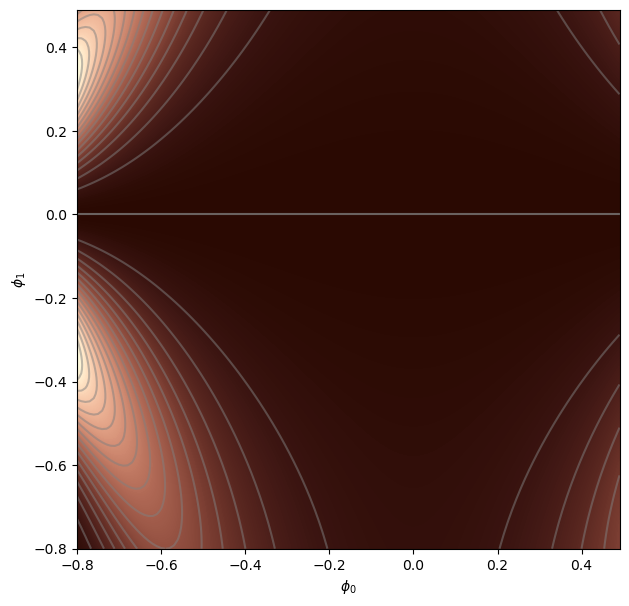

In [9]:
# Let's visualize the regularization term
alpha = 0.1
reg_term = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        reg_term[idphi0, idphi1] = get_reg_term(phi1,phi0, alpha)


draw_function(phi0mesh, phi1mesh, reg_term, my_colormap)

As you would expect, the regularization term is largest where the magnitude or the gradient of the original loss function was biggest (i.e., where it was steepest)

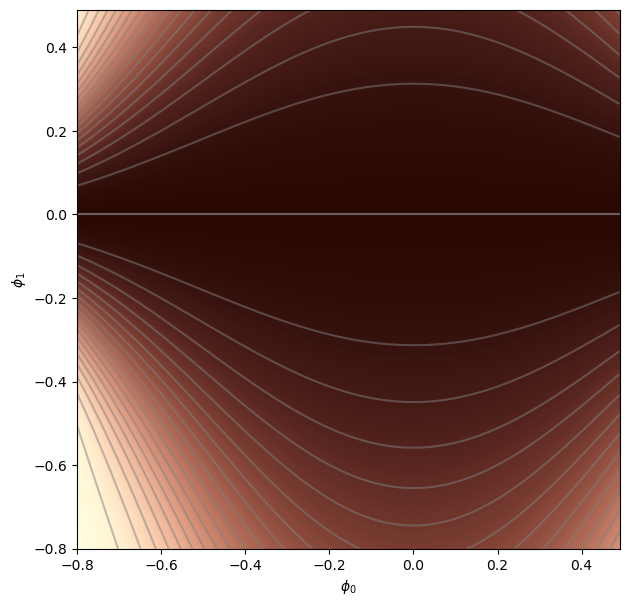

In [10]:
# We'll also visualize the loss function plus the regularization term
alpha = 0.1
loss_function_reg = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        loss_function_reg[idphi0, idphi1] = loss_reg (phi1,phi0, alpha)

draw_function(phi0mesh, phi1mesh, loss_function_reg, my_colormap)

It looks pretty similar to the original loss function, but you can see from the contours that it is slightly different.

In [11]:
# Perform gradient descent n_steps times on modified loss function and return path
# Alpha is the step size for the gradient descent
# Alpha reg is the step size used to calculate the regularization term
def grad_descent_reg(start_posn, n_steps, alpha, alpha_reg):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):
        this_grad = get_loss_gradient_reg(grad_path[0,c_step], grad_path[1,c_step],alpha_reg);
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * this_grad[:,0]
    return grad_path;

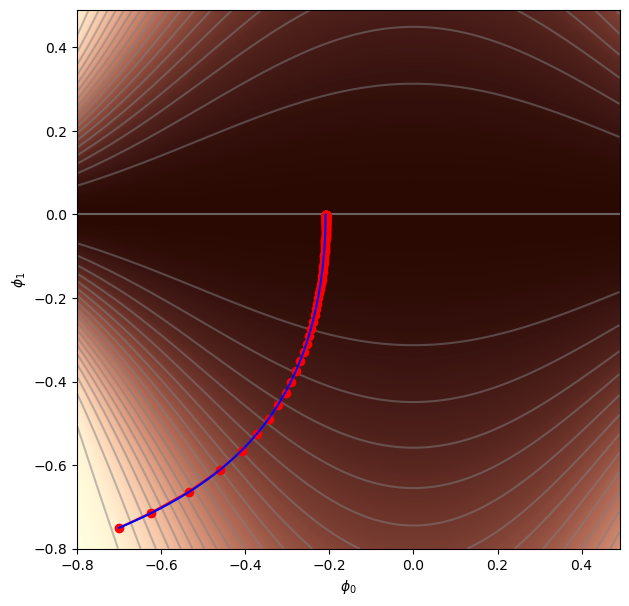

In [13]:
# Define the start position
start_posn = np.zeros((2,1)); start_posn[0,0] = -0.7; start_posn[1,0] = -0.75

# TODO:  Run the gradient descent on the modified loss
# function with 10000 steps and alpha_reg = 0.05, and a very small learning rate alpha of 0.001
# Replace this line:
grad_path_tiny_lr = grad_descent_reg(start_posn, 10000, 0.001, 0.05)


# TODO:  Run the gradient descent on the unmodified loss
# function with 100 steps and a very small learning rate alpha of 0.05
# Replace this line:
grad_path_typical_lr = grad_descent(start_posn, 100, 0.05)

# Draw the functions
draw_function(phi0mesh, phi1mesh, loss_function_reg, my_colormap, grad_path_tiny_lr, grad_path_typical_lr)

Now the two trajectories align.  The red curve runs gradient descent with a typical step size on the original loss function.  The blue curve simulates continuous gradient descent on the regularized loss function.